# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [50]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [51]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [52]:
! poetry show | grep matplotlib

matplotlib                               3.7.3        Python plotting package
matplotlib-inline                        0.1.6        Inline Matplotlib bac...


In [53]:
! pip freeze | grep matplotlib

matplotlib==3.7.1
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1660814786464/work


## Configuration

In [54]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [55]:
df = pd.read_csv(csv_file)

df.shape

(29451, 12)

In [56]:
df.sample(5)

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,address,longitude,latitude,targetprice_in_lacs
2653,Dealer,0,0,2,BHK,"1,190.06",1,1,"Ambedkar Nagar,Maharashtra",18.46,73.89,170.00
20922,Dealer,0,0,3,BHK,"1,600.00",1,1,"Gottigere,Bangalore",12.86,77.59,60.00
4472,Dealer,0,0,2,BHK,867.18,1,1,"Thakur Village,Mumbai",18.91,72.82,190.00
22561,Owner,0,0,3,BHK,"1,169.11",1,1,"Narayanpur,Kolkata",22.40,88.54,43.00
27697,Dealer,1,1,3,BHK,"2,259.34",0,1,"Vesu,Surat",21.14,72.77,97.40


## EDA

In [57]:
df.isna().sum()

posted_by              0
under_construction     0
rera                   0
bhk_no                 0
bhk_or_rk              0
square_ft              0
ready_to_move          0
resale                 0
address                0
longitude              0
latitude               0
targetprice_in_lacs    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   posted_by            29451 non-null  object 
 1   under_construction   29451 non-null  int64  
 2   rera                 29451 non-null  int64  
 3   bhk_no               29451 non-null  int64  
 4   bhk_or_rk            29451 non-null  object 
 5   square_ft            29451 non-null  float64
 6   ready_to_move        29451 non-null  int64  
 7   resale               29451 non-null  int64  
 8   address              29451 non-null  object 
 9   longitude            29451 non-null  float64
 10  latitude             29451 non-null  float64
 11  targetprice_in_lacs  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [59]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00"


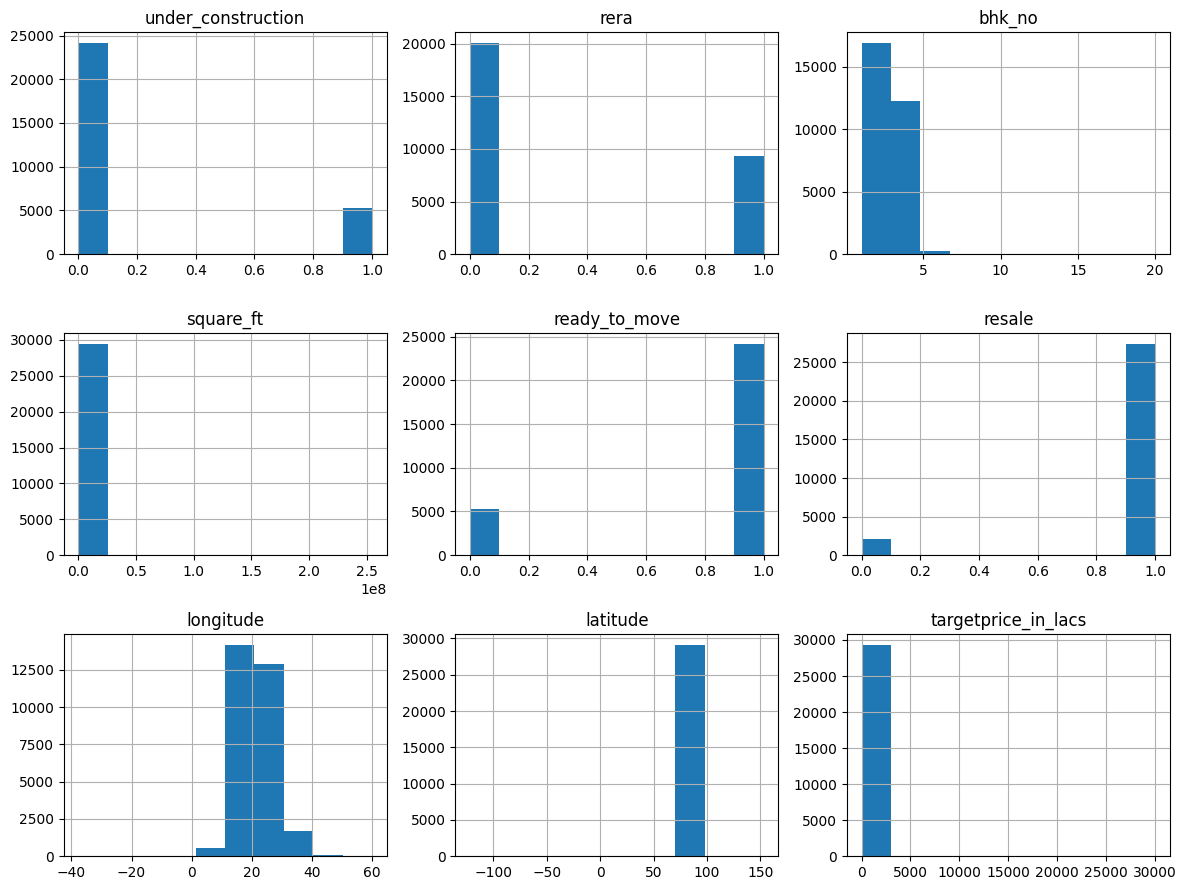

In [60]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

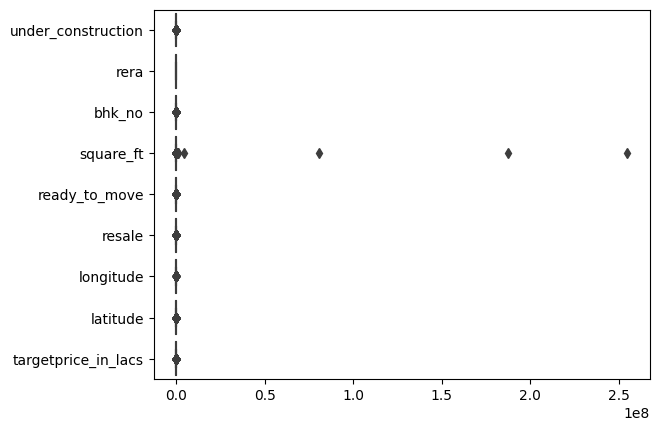

In [61]:
sns.boxplot(data=df, orient='h')

### Categories

In [62]:
df['posted_by'].value_counts()

posted_by
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [63]:
df['bhk_or_rk'].value_counts()

bhk_or_rk
BHK    29427
RK        24
Name: count, dtype: int64

In [64]:
df = pd.get_dummies(df, columns=['posted_by', 'bhk_or_rk'])#, drop_first=True)b

In [65]:
# dummies = pd.get_dummies(df['posted_by']).astype(int)

### Correlation

In [66]:
df.head()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,address,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
0,0,0,2,"1,300.24",1,1,"Ksfc Layout,Bangalore",12.97,77.60,55.00,False,False,True,True,False
1,0,0,2,"1,275.00",1,1,"Vishweshwara Nagar,Mysore",12.27,76.64,51.00,False,True,False,True,False
2,0,0,2,933.16,1,1,"Jigani,Bangalore",12.78,77.63,43.00,False,False,True,True,False
3,0,1,2,929.92,1,1,"Sector-1 Vaishali,Ghaziabad",28.64,77.34,62.50,False,False,True,True,False
4,1,0,2,999.01,0,1,"New Town,Kolkata",22.59,88.48,60.50,False,True,False,True,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   29451 non-null  int64  
 1   rera                 29451 non-null  int64  
 2   bhk_no               29451 non-null  int64  
 3   square_ft            29451 non-null  float64
 4   ready_to_move        29451 non-null  int64  
 5   resale               29451 non-null  int64  
 6   address              29451 non-null  object 
 7   longitude            29451 non-null  float64
 8   latitude             29451 non-null  float64
 9   targetprice_in_lacs  29451 non-null  float64
 10  posted_by_Builder    29451 non-null  bool   
 11  posted_by_Dealer     29451 non-null  bool   
 12  posted_by_Owner      29451 non-null  bool   
 13  bhk_or_rk_BHK        29451 non-null  bool   
 14  bhk_or_rk_RK         29451 non-null  bool   
dtypes: bool(5), float64(4), int64(5), ob

dummies.dtypes

In [68]:
for c in df.columns:
    if df[c].dtype == bool:
        print(f'{c} {df[c].dtype}')
        df[c] = df[c].astype(int)

posted_by_Builder bool
posted_by_Dealer bool
posted_by_Owner bool
bhk_or_rk_BHK bool
bhk_or_rk_RK bool


In [69]:
df.corr()

ValueError: could not convert string to float: 'Ksfc Layout,Bangalore'

In [70]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   29451 non-null  int64  
 1   rera                 29451 non-null  int64  
 2   bhk_no               29451 non-null  int64  
 3   square_ft            29451 non-null  float64
 4   ready_to_move        29451 non-null  int64  
 5   resale               29451 non-null  int64  
 6   address              29451 non-null  object 
 7   longitude            29451 non-null  float64
 8   latitude             29451 non-null  float64
 9   targetprice_in_lacs  29451 non-null  float64
 10  posted_by_Builder    29451 non-null  int64  
 11  posted_by_Dealer     29451 non-null  int64  
 12  posted_by_Owner      29451 non-null  int64  
 13  bhk_or_rk_BHK        29451 non-null  int64  
 14  bhk_or_rk_RK         29451 non-null  int64  
dtypes: float64(4), int64(10), object(1)


In [71]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'Ksfc Layout,Bangalore'

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [16]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os
